In [2]:
from pandas.plotting import scatter_matrix
from sklearn import datasets, linear_model
from sklearn import preprocessing


from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

# Diabetes Data Set

### Description

In [10]:
#Let´s show the dictionary and some useful description 
print(diabetes_data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

# Diabetes dataset

    Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood 
    serum measurements were obtained for each of n = 442 diabetes patients, as well as the
    response of interest, a quantitative measure of disease progression one year after 
    baseline.

Importance: Diabetes has become the pandemic of the twenty-first century. Most are cases of type 2 diabetes (body produces insulin but does not use it efficiently) that can be prevented. Knowing in time and changing habits can save your life. identifying the glucose level of the following patients, we will be able to give way to their corresponding treatments.


### Target:
    Column 11 is a quantitative measure of disease progression one year after baseline.

In [11]:
# New dataFrame with all diabetes_data's data.
diabetes_df = pd.DataFrame( diabetes_data.data, columns = diabetes_data.feature_names)

In [12]:
# Here , we call the taget array which is already defined in our dataset and assign it to a new column called 'glucosa_level
diabetes_df['glucosa_level'] = diabetes_data.target

# Rename columns
new_columns = {'bmi':'indice_masa_corporal', 'bp': 'presion_sanguinia_promedio',}
diabetes_df = diabetes_df.rename(columns = new_columns)

#Print.
#diabetes_df.head()
#print(diabetes_df[50:150])

The following 10 features variables was scaled by the standard desviation times n_samples, so let´s prove it...

In [13]:
print('\nNote: The sum of squares of each column totals 1\n')

print('1)  ','age --------------------------->', (diabetes_df.age * diabetes_df.age).sum().round(2))
print('2)  ','sex --------------------------->', (diabetes_df.sex * diabetes_df.sex).sum().round(2))
print('3)  ','Body mass index --------------->', (diabetes_df.indice_masa_corporal * diabetes_df.indice_masa_corporal).sum().round(2))
print('4)  ','Average_blood_pressure -------->', (diabetes_df.presion_sanguinia_promedio * diabetes_df.presion_sanguinia_promedio).sum().round(2))
print('5)  ','s1 ---------------------------->', (diabetes_df.s1 * diabetes_df.s1).sum().round(2))
print('6)  ','s2 ---------------------------->', (diabetes_df.s2 * diabetes_df.s2).sum().round(2))
print('7)  ','s3 ---------------------------->', (diabetes_df.s3 * diabetes_df.s3).sum().round(2))
print('8)  ','s4 ---------------------------->', (diabetes_df.s4 * diabetes_df.s4).sum().round(2))
print('9)  ','s5 ---------------------------->', (diabetes_df.s5 * diabetes_df.s5).sum().round(2))
print('10) ','s6 ---------------------------->', (diabetes_df.s6 * diabetes_df.s6).sum().round(2))


Note: The sum of squares of each column totals 1

1)   age ---------------------------> 1.0
2)   sex ---------------------------> 1.0
3)   Body mass index ---------------> 1.0
4)   Average_blood_pressure --------> 1.0
5)   s1 ----------------------------> 1.0
6)   s2 ----------------------------> 1.0
7)   s3 ----------------------------> 1.0
8)   s4 ----------------------------> 1.0
9)   s5 ----------------------------> 1.0
10)  s6 ----------------------------> 1.0


## Description of glucosa classification...

|Min Range                | Max Range          |    Symptoms       |   Classification |
|-------------------------|--------------------|-------------------|------------------|
| from 0 mg/dl            |less than 40 mg/dl  |   Neuroglycopenic symptoms:   lethargy, weakness, disorientation, seizures and passing out                | *hypoglycaemia.|
| from 40 mg/dl           |80 mg/dl            |   Adrenergic symptoms (headache, abdominal pain, sweating)|  *hypoglycaemia. |            |
|from 80 mg/dl | 150 mg/dl| Normal| Glucosa Normal|
|pass 150 mg/dl|less than 200 mg/dl |It'll take a lot of work, attention and (painful) BG checks to reach this target range | *hyperglycaemia.|
|pass 200| ahead|Risk of vascular complications of the high BG is signicantly elevated.|*hyperglycaemia. |


### Classification of the name of glucosa base on the glucosa_level column where will be applied the following:

In [14]:
diabetes_df.loc[(diabetes_df['glucosa_level'] < 40  ),                                          'classification'] = 'hipo_neuronal'
diabetes_df.loc[(diabetes_df['glucosa_level'] >= 40 ) & (diabetes_df['glucosa_level'] < 80   ), 'classification'] = 'hipo_adrenergic'
diabetes_df.loc[(diabetes_df['glucosa_level'] >= 80 ) & (diabetes_df['glucosa_level'] <= 150 ), 'classification'] = 'average'
diabetes_df.loc[(diabetes_df['glucosa_level'] > 150 ) & (diabetes_df['glucosa_level'] <= 200 ), 'classification'] = 'hiper_ideal'
diabetes_df.loc[(diabetes_df['glucosa_level'] > 200 ),                                          'classification'] = 'hiper_danger'

In [15]:
diabetes_df.head()#.round(4)

,age,sex,indice_masa_corporal,presion_sanguinia_promedio,s1,s2,s3,s4,s5,s6,glucosa_level,classification
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0,hiper_ideal
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0,hipo_adrenergic
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0,average
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0,hiper_danger
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0,average


Now we have already 5 classifications of glucose , which were the following:

hyper-positive: which is considered the last but ideal for its control.

hyper_danger: on board of an attack.

average: the hypo-uronal standard---->glucose extremely below average (we look like duncks).

hipo_adreneric:  The body begins to warn with not very nice symptoms.
hipo_neuronal: where the GB level is the lowest.

# Let's start the analisis.

### Size of the Data Frame

In [16]:
print('\nData Set Characteristics:\n')

diabetes_shape = diabetes_df.shape

print (f"Number of Instances/Rows -----------> {diabetes_shape[0]}.")
print (f"Number of Attributes/Columns -------> {diabetes_shape[1]}.\n")


Data Set Characteristics:

Number of Instances/Rows -----------> 442.
Number of Attributes/Columns -------> 12.



### Shaping the data set.

In [17]:
# Dataset Description
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 12 columns):
age                           442 non-null float64
sex                           442 non-null float64
indice_masa_corporal          442 non-null float64
presion_sanguinia_promedio    442 non-null float64
s1                            442 non-null float64
s2                            442 non-null float64
s3                            442 non-null float64
s4                            442 non-null float64
s5                            442 non-null float64
s6                            442 non-null float64
glucosa_level                 442 non-null float64
classification                442 non-null object
dtypes: float64(11), object(1)
memory usage: 41.5+ KB


### Looking for empty values
     We can see that there are not any empty data  using isnull() and isna() function.

In [18]:
#Checking if there are Null values 
diabetes_df.isnull().sum()

age                           0
sex                           0
indice_masa_corporal          0
presion_sanguinia_promedio    0
s1                            0
s2                            0
s3                            0
s4                            0
s5                            0
s6                            0
glucosa_level                 0
classification                0
dtype: int64

In [19]:
#Check if there are NaN values
diabetes_df.isna().sum()


age                           0
sex                           0
indice_masa_corporal          0
presion_sanguinia_promedio    0
s1                            0
s2                            0
s3                            0
s4                            0
s5                            0
s6                            0
glucosa_level                 0
classification                0
dtype: int64

### Duplicated values in the data frame.

In [20]:
Duplicated =  diabetes_df.duplicated().sum()

print(f"There are {Duplicated} duplicated values.")

There are 0 duplicated values.


In [21]:
#Looking for duplicated data
diabetes_df[diabetes_df.duplicated()==True]

,age,sex,indice_masa_corporal,presion_sanguinia_promedio,s1,s2,s3,s4,s5,s6,glucosa_level,classification


# Univariate Analysis

    We will analyze the 'glucose level' column, since it is numerical and with it the classification objective can be achieved.



### Central Tendency

In [22]:
new_df = pd.DataFrame(diabetes_df, columns = ['glucosa_level'])
new_df.glucosa_level.describe()

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: glucosa_level, dtype: float64

### Some annotations:

It can be seen that our average is slightly above the average glucose level (150 mg / dl).

Similarly, the lowest glucose level is 25 mg / dl which means that there are patients who arrive at neuroglycopenic symptoms.

While our highest level is quite the opposite, it exceeds 200 mg / dL which means that passive is at risk of vascular problems.






### Getting the mode

In [23]:
diabetes_mode = diabetes_df.glucosa_level.mode()
diabetes_mode

0     72.0
1    200.0
dtype: float64

In [24]:
minimo = len(diabetes_df[diabetes_df['glucosa_level'] == 72])
maximo = len(diabetes_df[diabetes_df['glucosa_level'] == 200])
print(f"\nMinumun glucosa level value: {diabetes_mode[0]}\nThere are {minimo} minimun values\n ")
print(f"Maximun glucosa level value: {diabetes_mode[1]}\nThere are {maximo} minimun values\n ")


Minumun glucosa level value: 72.0
There are 6 minimun values
 
Maximun glucosa level value: 200.0
There are 6 minimun values
 


### Kurtosis 

In [25]:
diabetes_df.glucosa_level.kurtosis()
#platicurtica.

-0.8830573344098585

### Skewness

In [26]:
#Here we look for the skewness 
diabetes_df.glucosa_level.skew()

0.44056293407014124

Let's see how many values of each type of the last 5 classifications we have.

In [27]:
#Varibale dist
diabetes_df.classification.value_counts()

average            147
hiper_danger       121
hipo_adrenergic     90
hiper_ideal         79
hipo_neuronal        5
Name: classification, dtype: int64

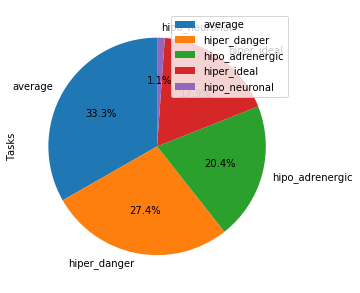

In [28]:
Data = {'Tasks': [147, 121,90,79,5]}
#Create a new dataframe with onli two values and two variables
df = pd.DataFrame(Data,columns=['Tasks'],index =['average','hiper_danger','hipo_adrenergic','hiper_ideal','hipo_neuronal'])

df.plot.pie(y='Tasks',figsize=(10, 5), startangle = 90,autopct='%1.1f%%')
plt.savefig("Peple_lorD.png")

<BarContainer object of 5 artists>

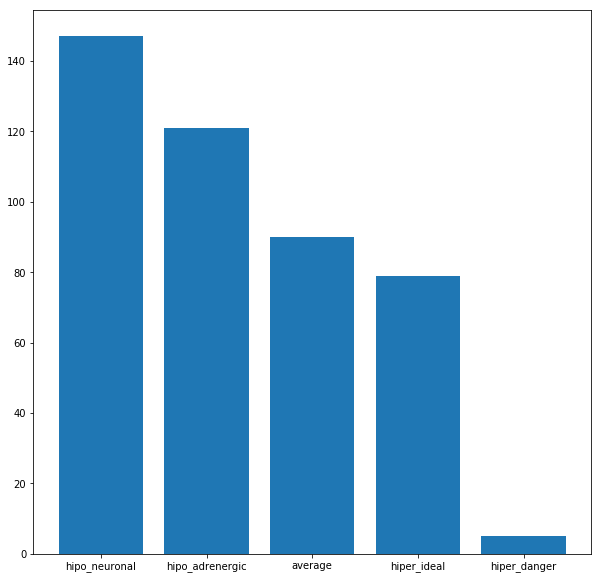

In [29]:
#Looking for the balance of de data
plt.rcParams["figure.figsize"] = (10,10)
plt.bar(['hipo_neuronal','hipo_adrenergic', 'average', 'hiper_ideal', 'hiper_danger'],diabetes_df.classification.value_counts())

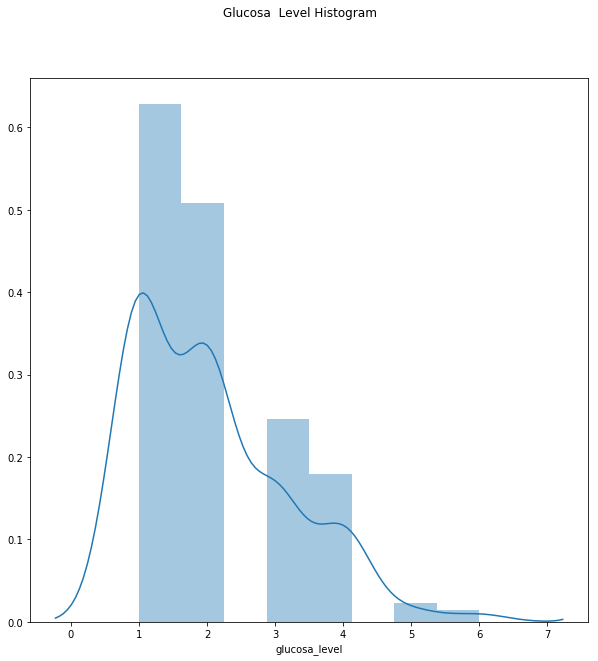

In [30]:
plt.suptitle('Glucosa  Level Histogram')
plt.rcParams['figure.figsize'] = (5,5)
x = diabetes_df.glucosa_level.value_counts()
dist = sns.distplot(x)

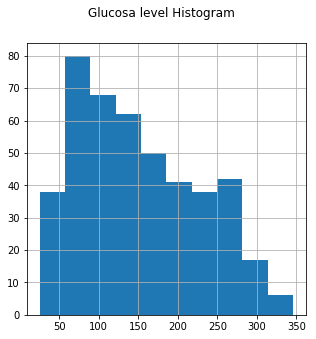

In [31]:
# HISTOGRAMS OF EACH COLUMN
plt.rcParams["figure.figsize"] = (5,5)
diabetes_df.glucosa_level.hist()

plt.suptitle('Glucosa level Histogram')
plt.show()

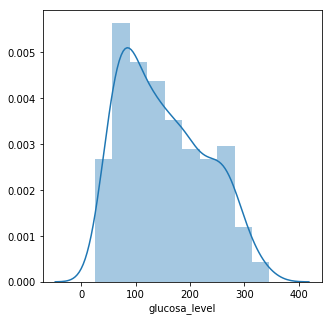

In [32]:
plt.figure(figsize=(5,5))
plt.tight_layout()
sns.distplot(diabetes_df['glucosa_level'])

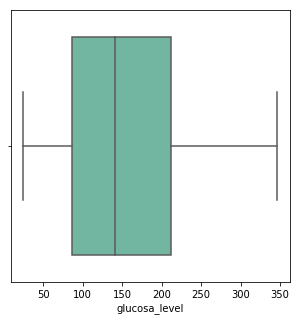

In [33]:
ax = sns.boxplot( x = "glucosa_level", hue= "classification", data = diabetes_df, palette = "Set2")

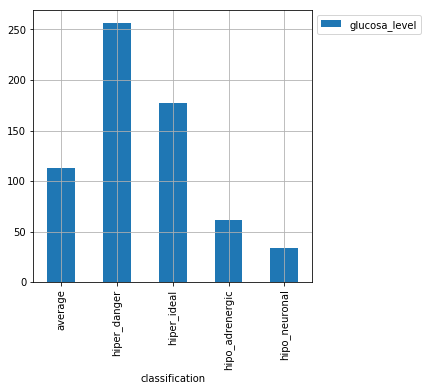

In [34]:
diabetes_df.groupby(by = 'classification')['glucosa_level'].mean().plot(kind = 'bar')
plt.grid(True)
plt.legend( loc = 'upper left',bbox_to_anchor = (1,1))
plt.show()

# Multivariate Analisis

In [35]:
diabetes_df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
age,442.0,-0.00,0.05,-0.11,-0.04,0.01,0.04,0.11
sex,442.0,0.00,0.05,-0.04,-0.04,-0.04,0.05,0.05
indice_masa_corporal,442.0,-0.00,0.05,-0.09,-0.03,-0.01,0.03,0.17
presion_sanguinia_promedio,442.0,0.00,0.05,-0.11,-0.04,-0.01,0.04,0.13
s1,442.0,-0.00,0.05,-0.13,-0.03,-0.00,0.03,0.15
s2,442.0,0.00,0.05,-0.12,-0.03,-0.00,0.03,0.20
s3,442.0,-0.00,0.05,-0.10,-0.04,-0.01,0.03,0.18
s4,442.0,0.00,0.05,-0.08,-0.04,-0.00,0.03,0.19
s5,442.0,-0.00,0.05,-0.13,-0.03,-0.00,0.03,0.13
s6,442.0,-0.00,0.05,-0.14,-0.03,-0.00,0.03,0.14


In [36]:
#Getting the mode

mode = diabetes_df.mode()
mode

,age,sex,indice_masa_corporal,presion_sanguinia_promedio,s1,s2,s3,s4,s5,s6,glucosa_level,classification
0,0.016281,-0.044642,-0.030996,-0.040099,-0.037344,-0.001001,-0.013948,-0.039493,-0.018118,0.003064,72.0,average
1,NaN,NaN,-0.024529,-0.005671,-0.007073,0.016222,NaN,NaN,NaN,NaN,200.0,NaN


In [37]:
diabetes_df.skew()

age                          -0.231382
sex                           0.127385
indice_masa_corporal          0.598148
presion_sanguinia_promedio    0.290664
s1                            0.378108
s2                            0.436592
s3                            0.799255
s4                            0.735374
s5                            0.291774
s6                            0.207917
glucosa_level                 0.440563
dtype: float64

In [38]:
diabetes_df.kurtosis()
#platicurtica.

age                          -0.671224
sex                          -1.992811
indice_masa_corporal          0.095094
presion_sanguinia_promedio   -0.532780
s1                            0.232948
s2                            0.601381
s3                            0.981507
s4                            0.444402
s5                           -0.134366
s6                            0.236917
glucosa_level                -0.883057
dtype: float64

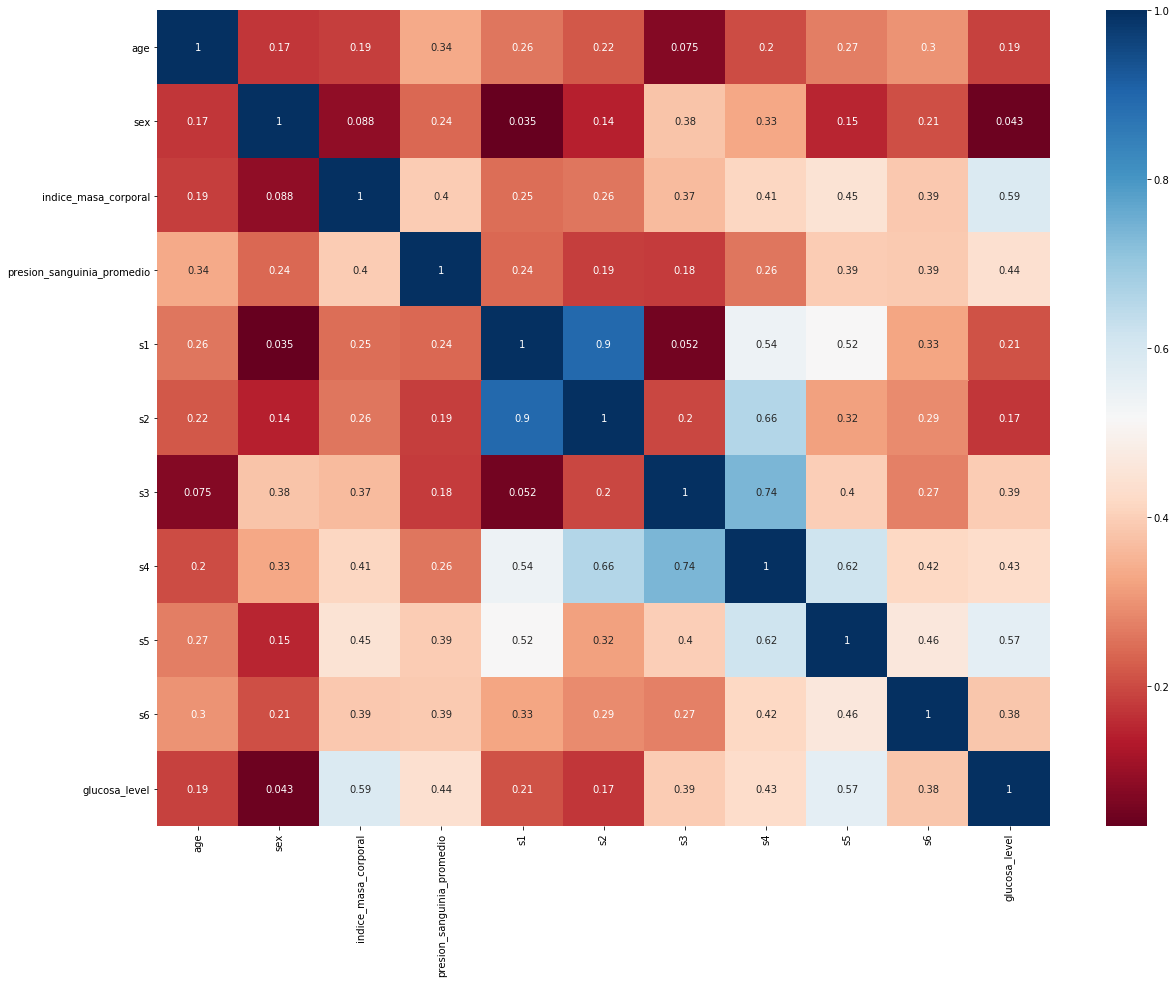

In [39]:
# Heatmap

correlation_matrix = diabetes_df.corr().abs()
plt.subplots(figsize=(20,15))
calors = sns.heatmap(correlation_matrix, annot = True, cmap = 'RdBu', xticklabels = True, yticklabels = True)

HeatMap = calors.get_figure() 

In [40]:
plt.savefig('HeatMap')

<Figure size 360x360 with 0 Axes>

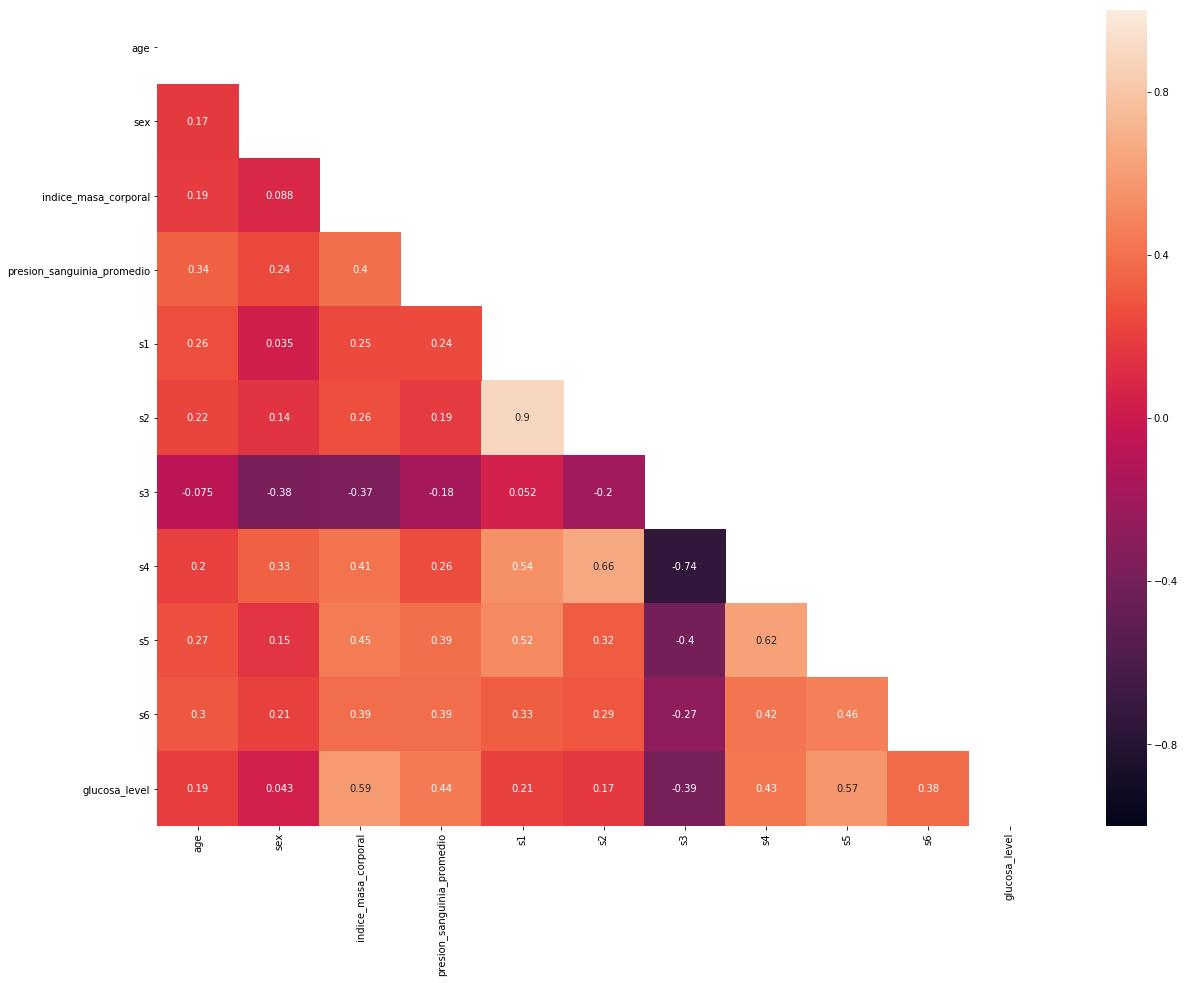

In [41]:
#Setting the size of the map
plt.rcParams['figure.figsize'] = (20,15)


# Correlation Matrix of the whole data set, so we can see the relationship between all the variables. 
correlation_matrix =diabetes_df.corr()
plt.show()

# Heatmap
mask = np.zeros_like(correlation_matrix, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(correlation_matrix, vmax = 1.0, vmin = -1.0, annot = True, mask = mask)
plt.show()

Some conclusion from this first graph: in this first super-high correlation graph we can realize that the ones that have the highest correlation between them are the blood samples, which I did not find a use, since they are only blood samples compared compared in a predetermined time. However, I will notice that we will work here with gucosa_level and the body mass index with 59%, which allows us to know which could allow us to know what the performance of the passenger is at that time.

## Let's see the behaivour of our data...

### Linel Regression

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [43]:
diabetes_data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [44]:
# Use only one feature
x = diabetes_data.data[:, np.newaxis, 2]


In [45]:
# Split the data into training/testing sets
diabetes_X_train = x[:-20]
diabetes_X_test = x[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_data.target[:-20]
diabetes_y_test = diabetes_data.target[-20:]

In [46]:

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)



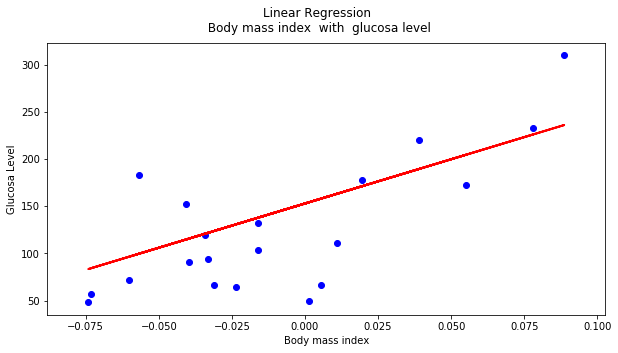

In [47]:
plt.rcParams["figure.figsize"] = (10,5)
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color = 'blue')
plt.plot(diabetes_X_test, diabetes_y_pred, color = 'red', linewidth=2)

#plt.xticks(())
#plt.yticks(())
plt.suptitle('Linear Regression\n Body mass index  with  glucosa level\n')
plt.xlabel('Body mass index')
plt.ylabel('Glucosa Level')
plt.show()

In [48]:
# The coefficients
print('Coefficients:', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))



Coefficients: [938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


### Pairplot

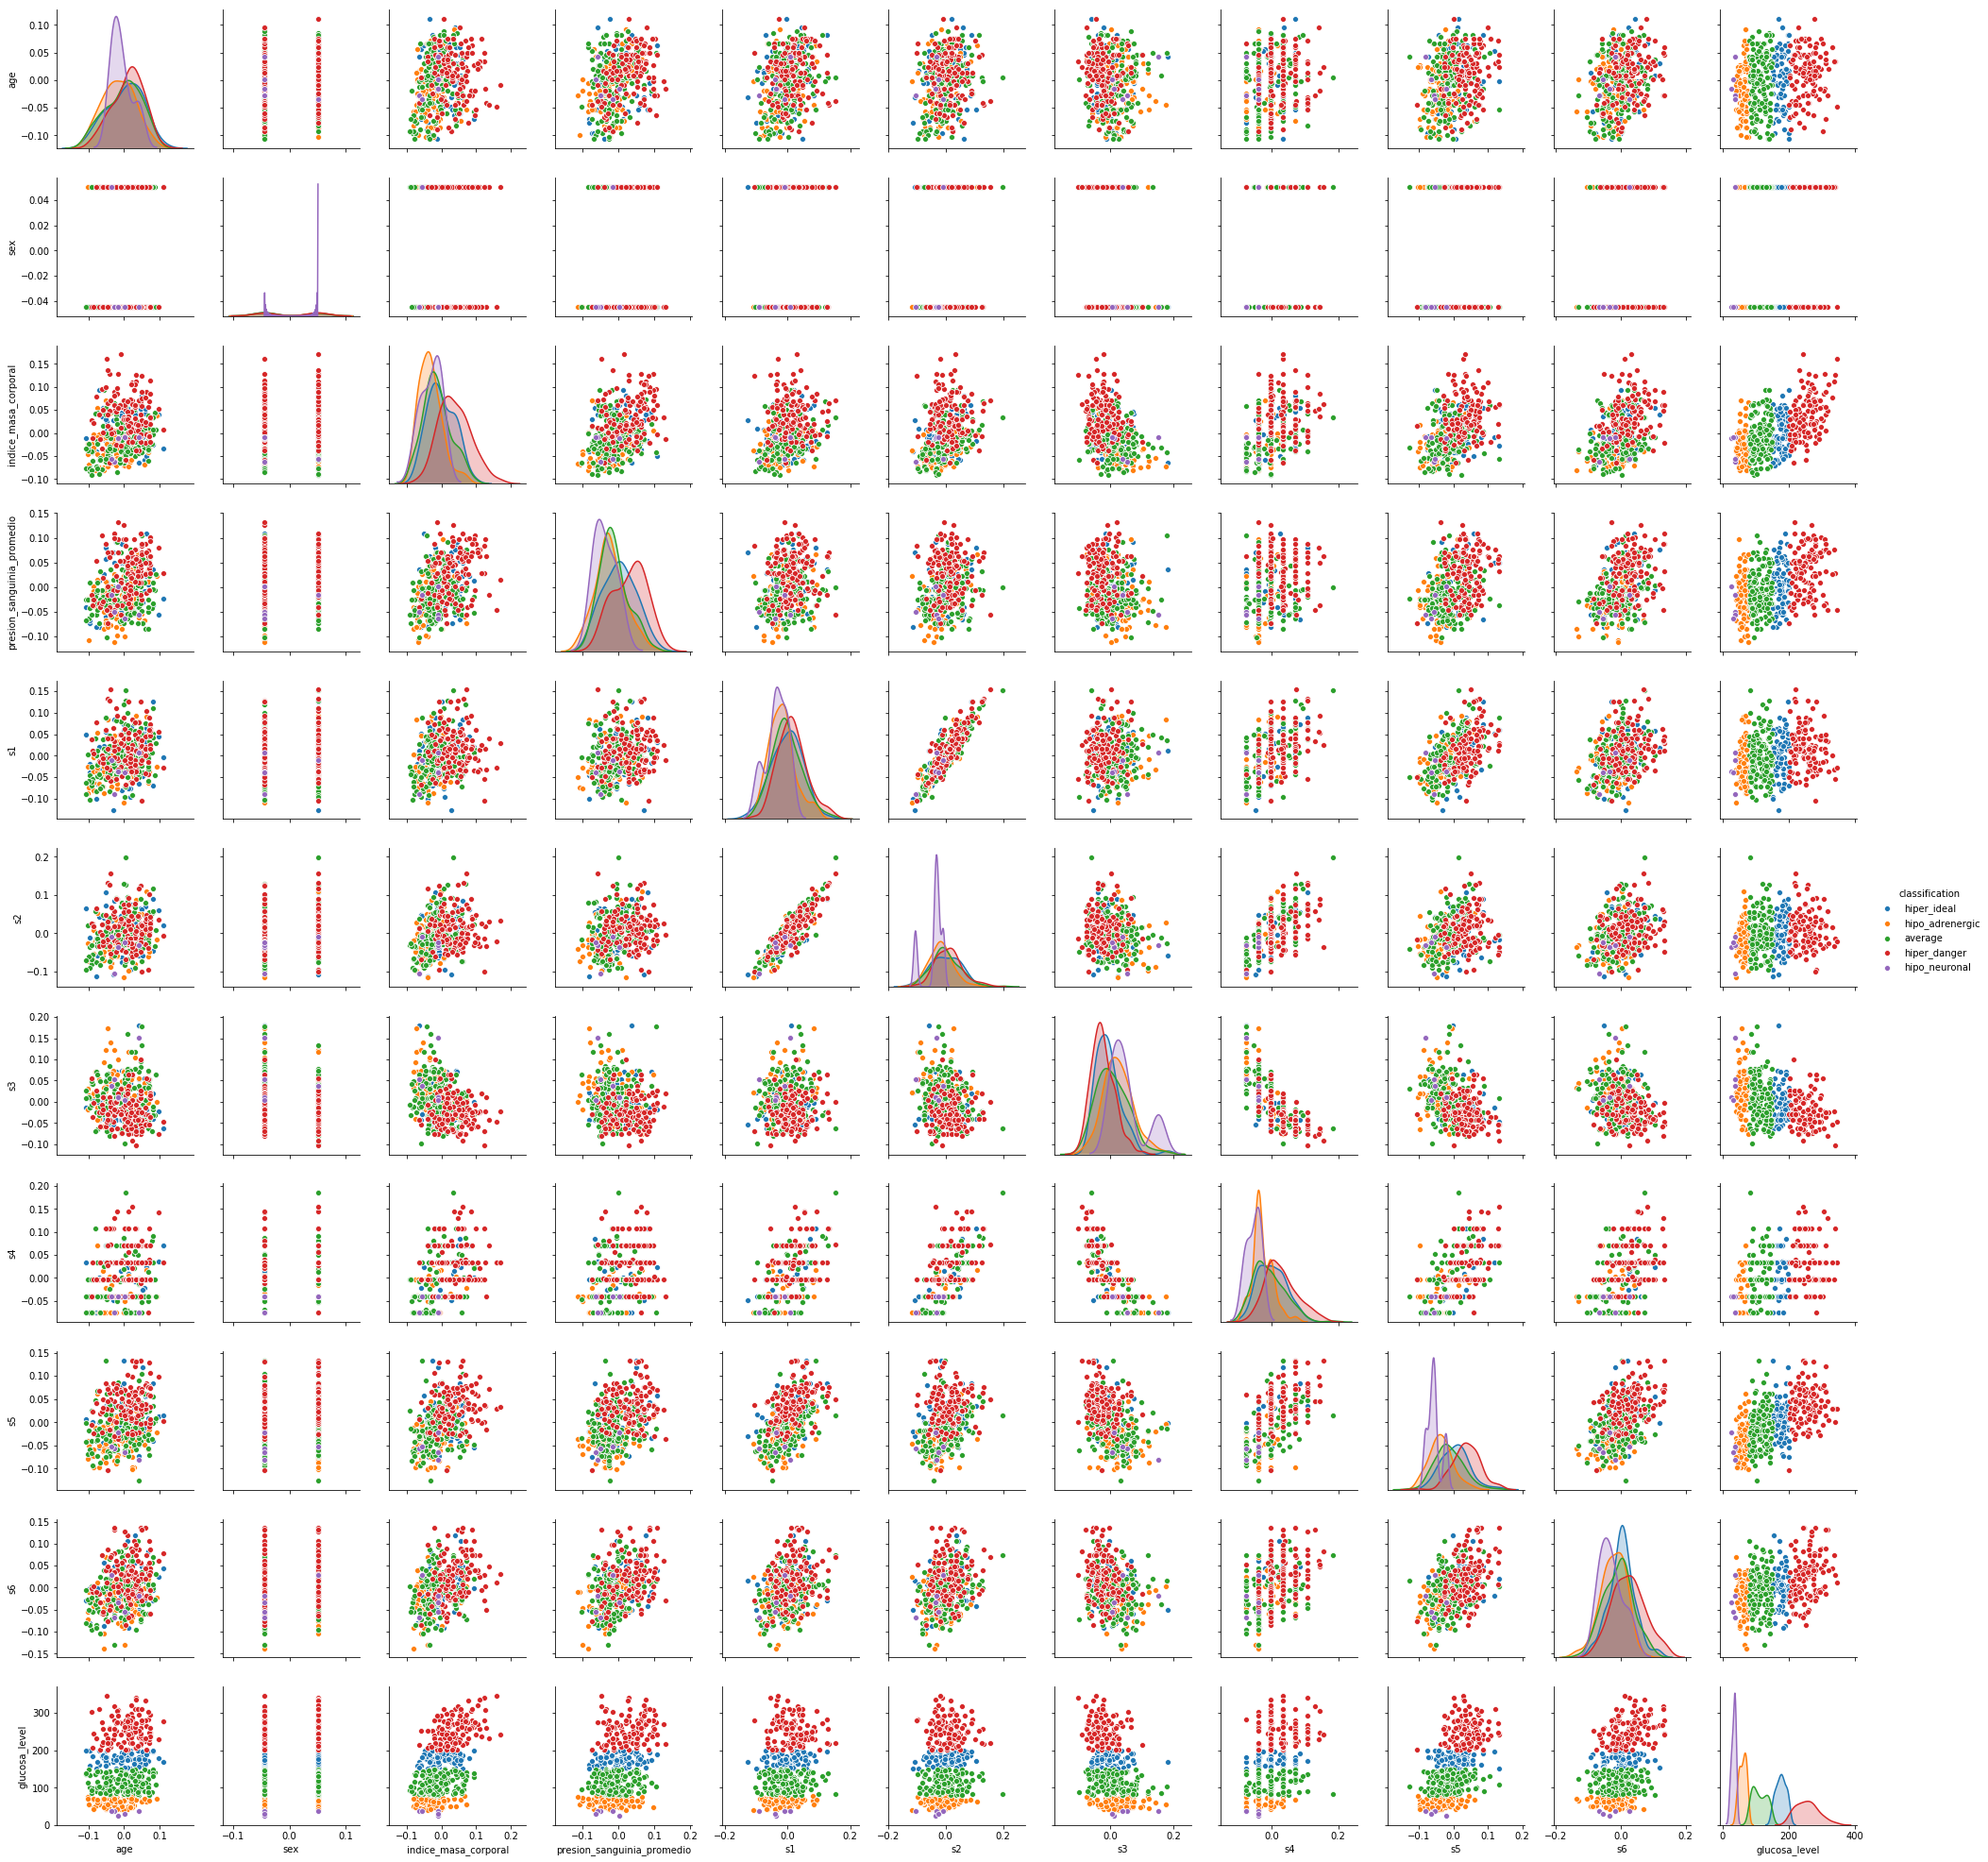

<Figure size 720x720 with 0 Axes>

In [38]:
D = sns.pairplot(diabetes_df, hue = 'classification') #dont run if targets are all numbers
plt.show()
plt.savefig('D.png')

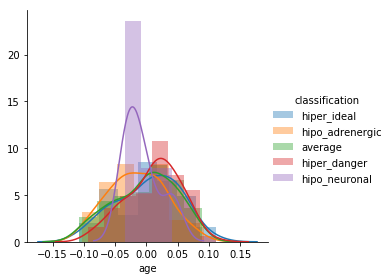

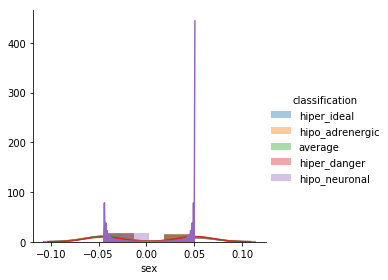

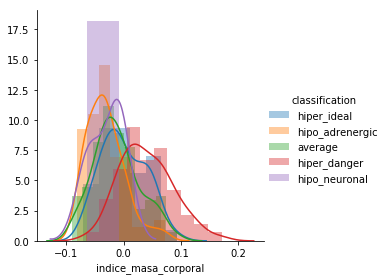

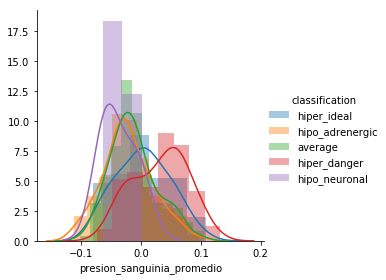

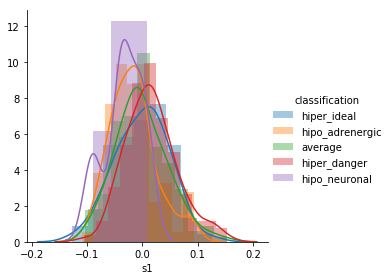

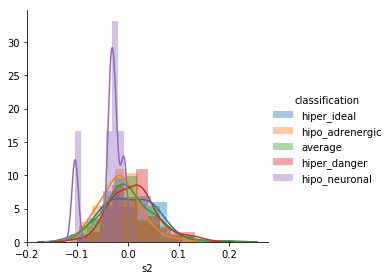

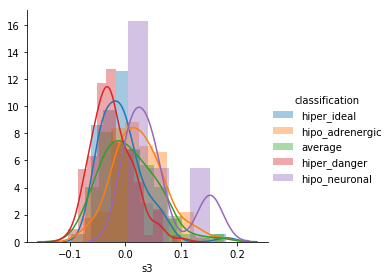

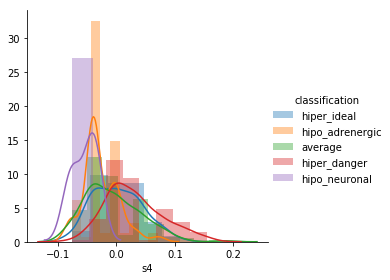

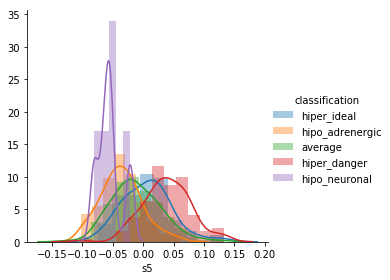

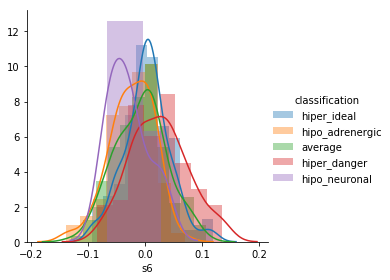

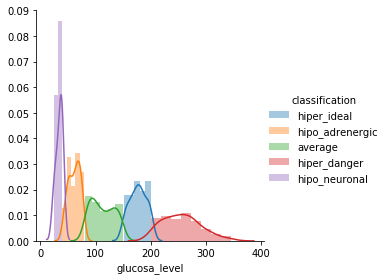

In [66]:
# Getting a close up to every distribution in each varaibles comparison 
# From here we will get which variables will be the most efficient to future calculations

for column in diabetes_df.columns[:11]:
    
    g = sns.FacetGrid(diabetes_df, hue = "classification", height = 4)
   
    g = g.map(sns.distplot, column)
    g = g.add_legend()
    
    plt.show()

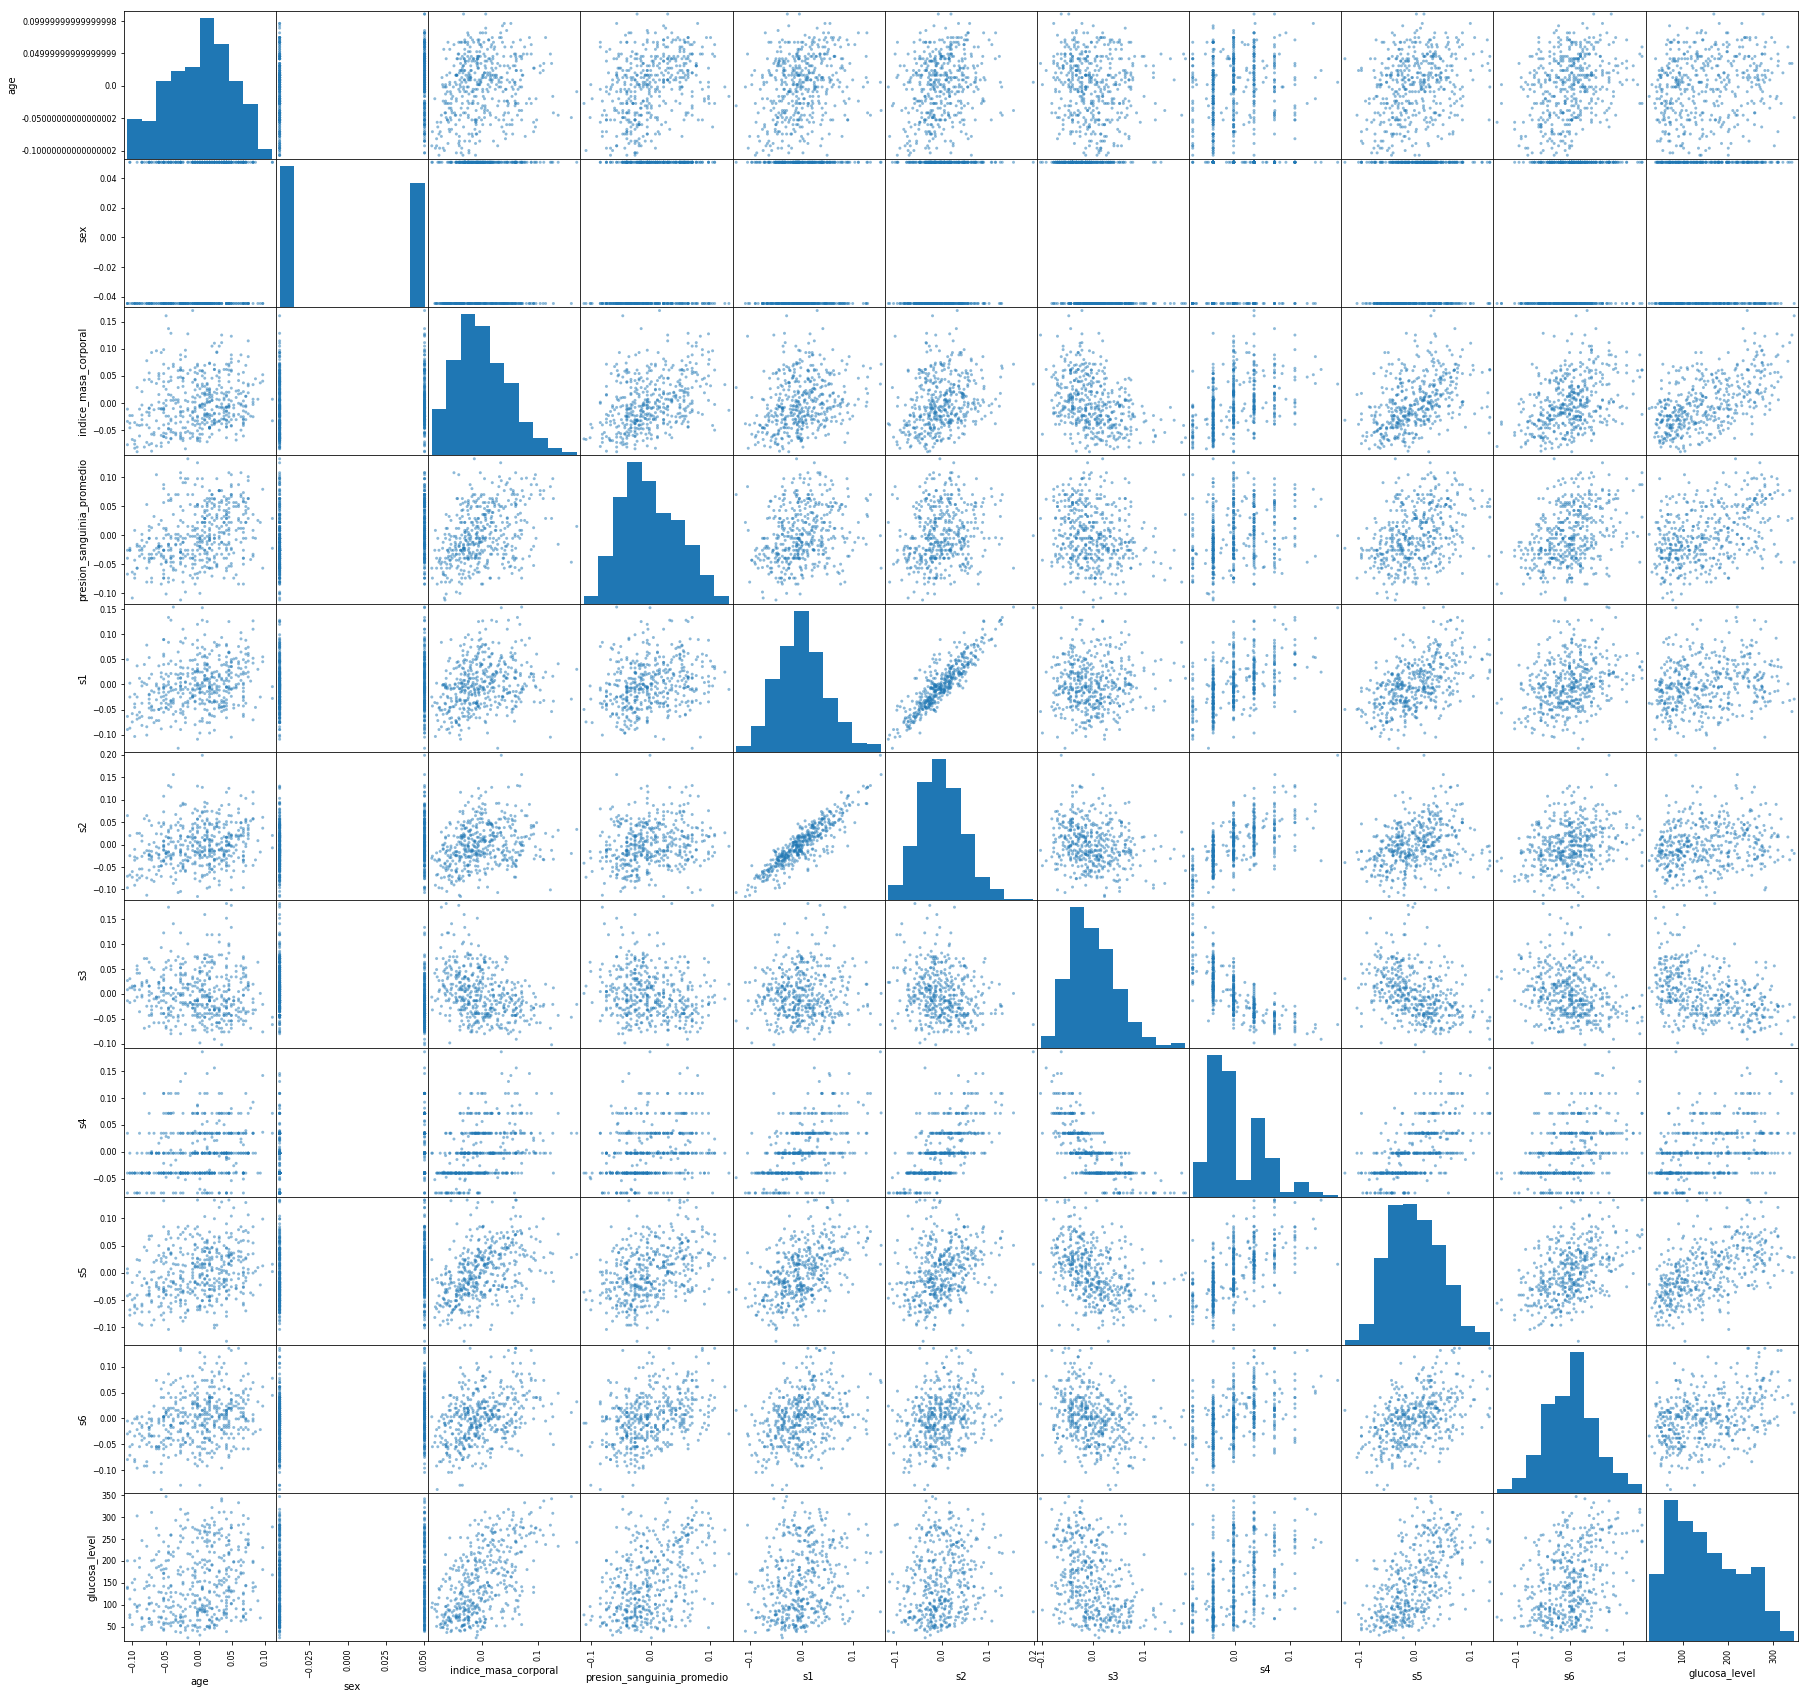

In [67]:
scatter_matrix(diabetes_df, figsize = (30, 30))
plt.show()

## Histograms

It tells us the frequency of how many people (with specific age) have a certain body mass index

In [40]:
pd.crosstab(diabetes_df['indice_masa_corporal'],diabetes_df['sex'], margins= True).head()

sex,-0.044641636506989,0.0506801187398187,All
indice_masa_corporal,,,
-0.090275,0,1,1
-0.089197,0,1,1
-0.084886,1,0,1
-0.083808,1,0,1
-0.081653,2,0,2


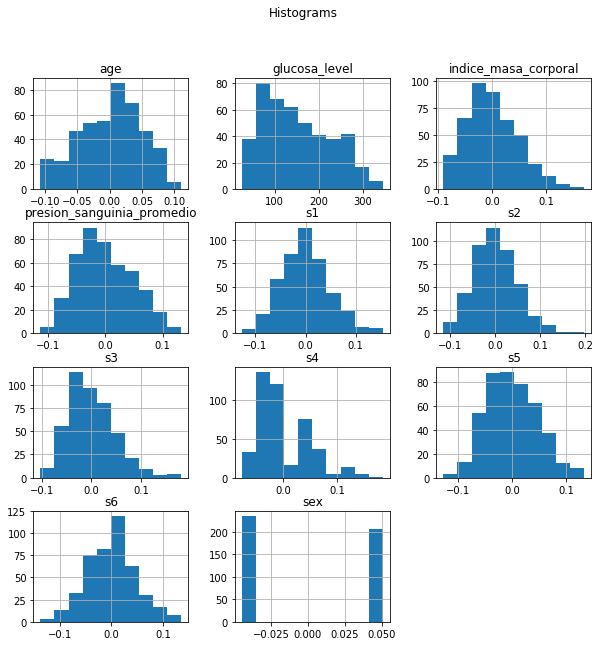

In [41]:
# HISTOGRAMS OF EACH COLUMN
plt.rcParams["figure.figsize"] = (10,10)
diabetes_df.hist()

plt.suptitle('Histograms')
plt.show()

Most of the graphs above show that they are positive asimetrics with the exception of the s4 blood sample, which seems to have a normal distribution and that of the sex shown by the 2 sexes.

### BoxPlot

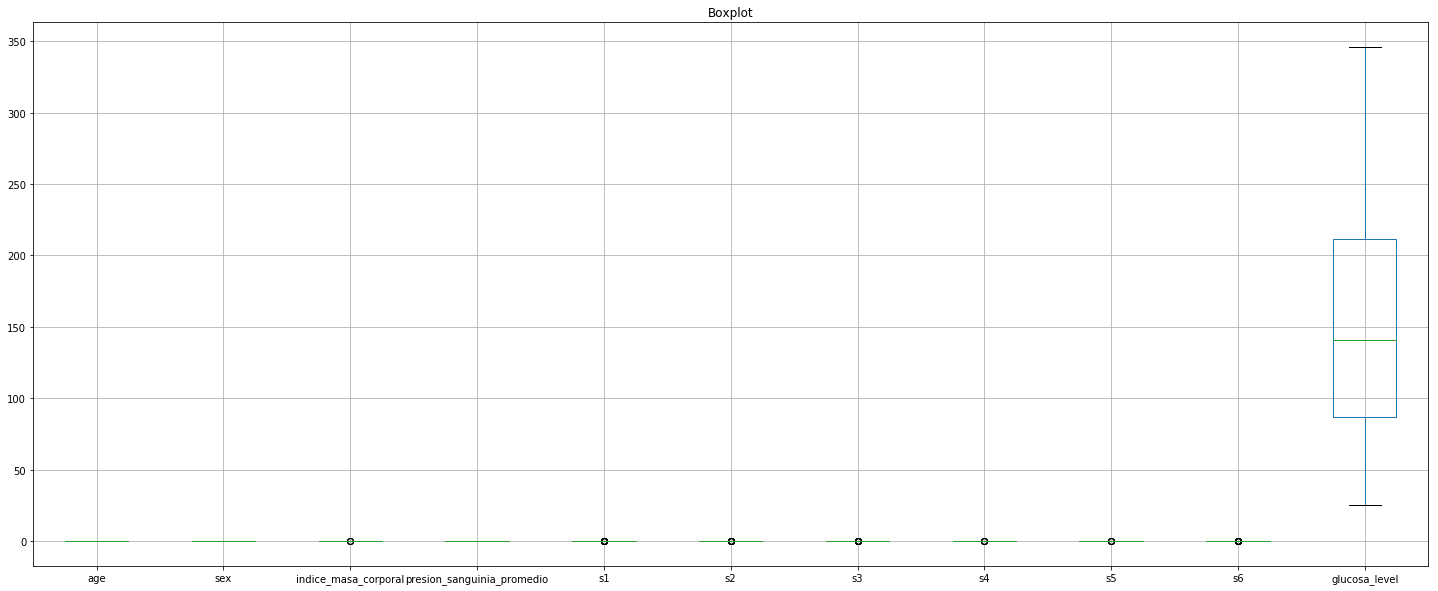

In [89]:
plt.rcParams["figure.figsize"] = (25,10)
diabetes_df.boxplot()
plt.title('Boxplot')
plt.show()

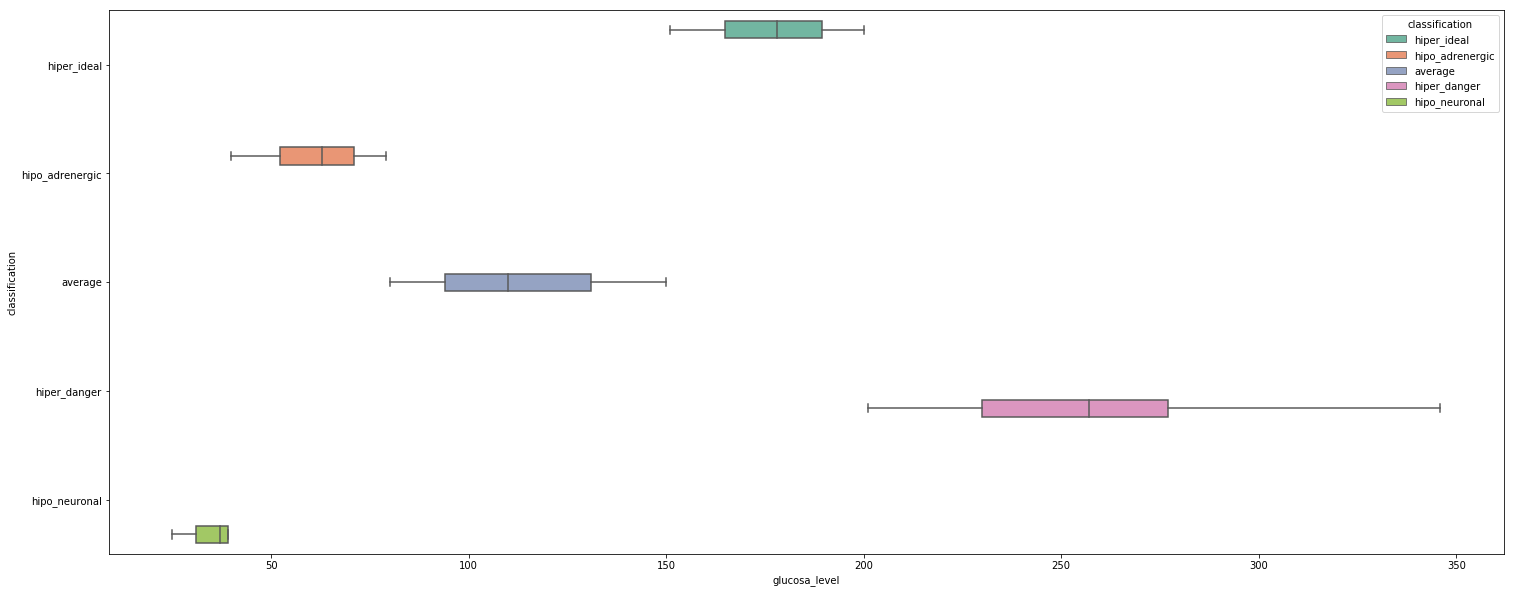

In [90]:
plt.rcParams["figure.figsize"] = (25,10)
ax = sns.boxplot(x= "glucosa_level", y= "classification", hue= "classification", data = diabetes_df, palette = "Set2")
plt.savefig('ax.png')

Neuronal_population: is below 40 mg / dl glucose level.

Hipo_adrenergic: unfortunately, people suffering from hypoglycemia are on average 60mg / dl.

Average: our patients are in the average range because the average seems to be between 110mg / dl.

Hyper_ideal: is below the previously defined average (more than 200 mg / dl).

Hiper_danger: It is alarming because its average is above 250 mg / dl.
